In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [28]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [45]:
# first_row = session.query(measurement).first()
# first_row.__dict__

In [46]:
# first_row = session.query(station).first()
# first_row.__dict__

In [38]:
# using inspect to get table info 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [39]:
m_columns = inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [40]:
s_columns = inspector.get_columns('station')
for c in s_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
## JOIN ????????????????????????????????????????????????????????????????????

In [50]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

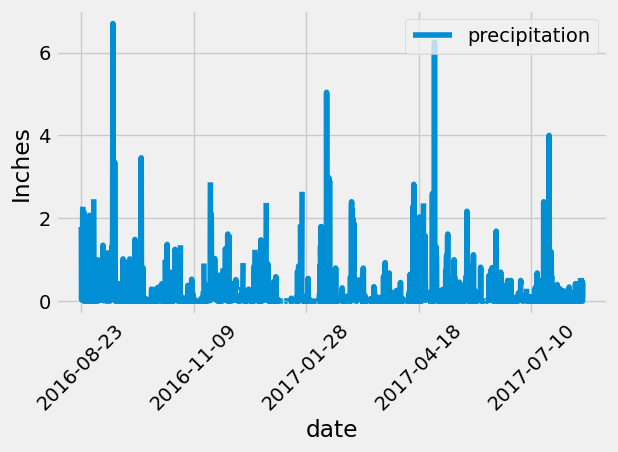

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
str(year_ago)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)
#print(prcp_df)

# Sort the dataframe by date
prcp_df = prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(measurement.station).distinct().count()
print(station_num)

9


In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(low_temp)
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(max_temp)
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


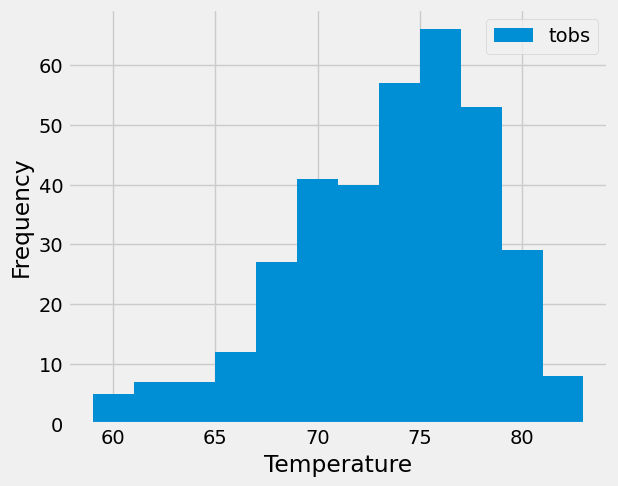

In [111]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.tobs).filter(measurement.date >= year_ago).filter(measurement.station == 'USC00519281').all()
temp_obs_df = pd.DataFrame(temp_obs, columns=['tobs'])

temp_obs_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature')
plt.show()

# Close session

In [112]:
# Close Session
session.close()